In [29]:
import cv2
import matplotlib.pyplot as plt

from utils import *
from darknet import Darknet

In [43]:
# Set the location and name of the cfg file
cfg_file = './cfg/yolov3.cfg'

# Set the location and name of the pre-trained weights file
weight_file = './weights/yolov3.weights'

# Set the location and name of the COCO object classes file
namesfile = 'data/coco.names'

# Load the network architecture
m = Darknet(cfg_file)

# Load the pre-trained weights
m.load_weights(weight_file)

# Load the COCO object classes
class_names = load_class_names(namesfile)
print(f"classes {class_names}")


classes ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [31]:
# Print the neural network used in YOLOv3
m.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256
   13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   14 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   15 shortcut 12
   16 conv    128  1 x 1

# Loading and Resizing Image

yolo input shape ==> 416 x 416 x 3

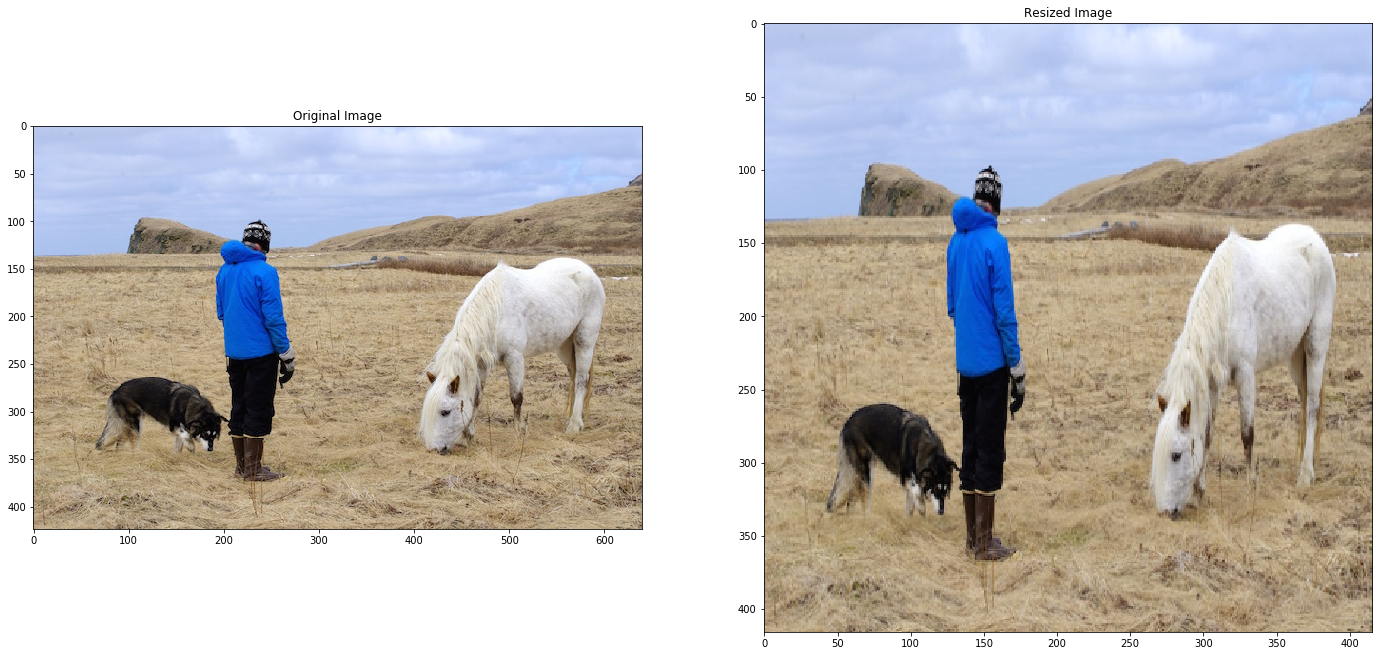

In [34]:
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Load the image
img = cv2.imread('./images/person.jpg')

# Convert the image to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# We resize the image to the input width and height of the first layer of the network.    
resized_image = cv2.resize(original_image, (m.width, m.height))

# Display the images
plt.subplot(121)
plt.title('Original Image')
plt.imshow(original_image)
plt.subplot(122)
plt.title('Resized Image')
plt.imshow(resized_image)
plt.show()

In [35]:
#Non-Maximal Suppression (NMS) 
nms_thresh = 0.6
# Set the IOU threshold
iou_thresh = 0.4

#if you want see at code these definitions look utils.py 



It took 1.918 seconds to detect the objects in the image.

Number of Objects Detected: 3 

Objects Found and Confidence Level:

1. person: 1.000000
2. dog: 0.999988
3. horse: 1.000000


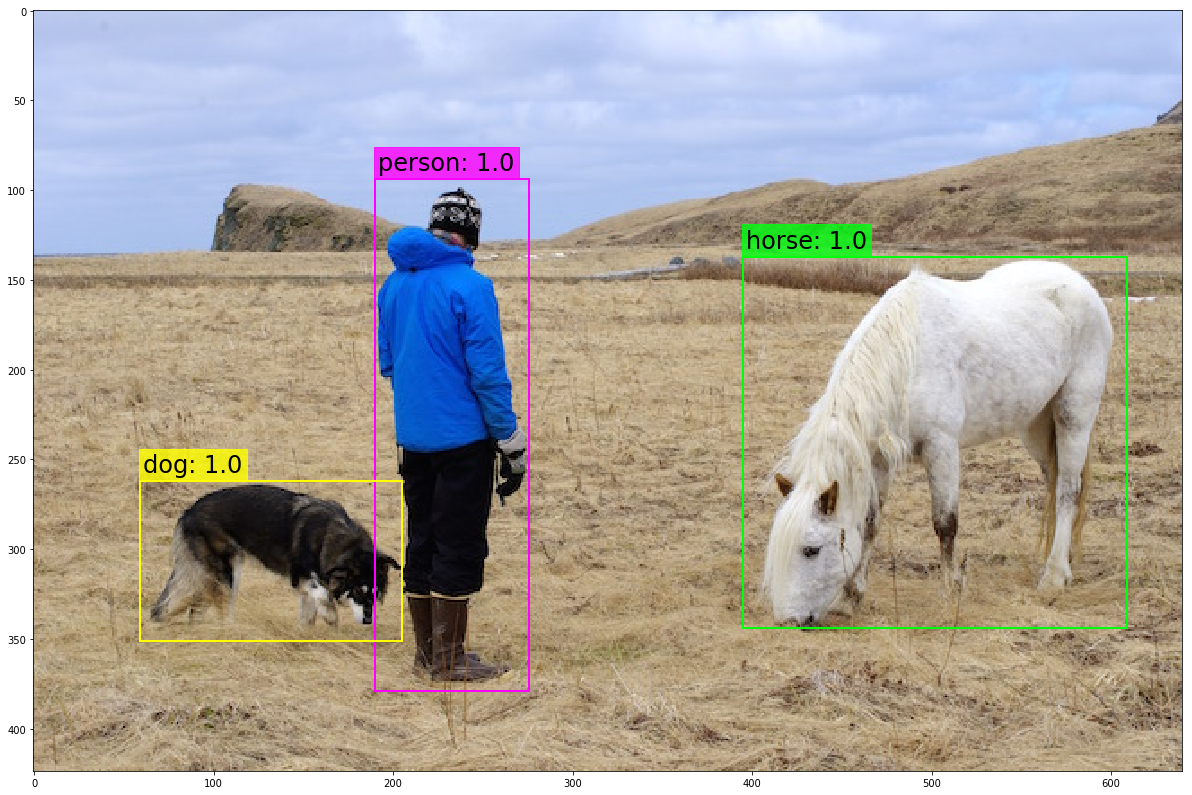

In [37]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Load the image
img = cv2.imread('./images/person.jpg')

# Convert the image to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# We resize the image to the input width and height of the first layer of the network.    
resized_image = cv2.resize(original_image, (m.width, m.height))

# Set the IOU threshold. Default value is 0.4
iou_thresh = 0.4

# Set the NMS threshold. Default value is 0.6
nms_thresh = 0.6

# Detect objects in the image
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

# Print the objects found and the confidence level
print_objects(boxes, class_names)

#Plot the image with bounding boxes and corresponding object class labels
plot_boxes(original_image, boxes, class_names, plot_labels = True)

# For Webcam

In [11]:
# Import the required modules
import cv2
from IPython.display import clear_output
import time
import PIL.Image
from io import BytesIO as StringIO
import IPython.display
import numpy as np
from utils import *
import random

In [38]:
def plot_boxes_image(img, boxes, class_names, plot_labels, colors):
    
    # Define a tensor used to set the colors of the bounding boxes   
    
    # Get the width and height of the image
    width = img.shape[1]
    height = img.shape[0]
        
    # Plot the bounding boxes and corresponding labels on top of the image
    for i in range(len(boxes)):

       
        # Get the ith bounding box
        box = boxes[i]
        
        # Get the (x,y) pixel coordinates of the lower-left and lower-right corners
        # of the bounding box relative to the size of the image. 
        x1 = int(np.around((box[0] - box[2]/2.0) * width))
        y1 = int(np.around((box[1] - box[3]/2.0) * height))
        x2 = int(np.around((box[0] + box[2]/2.0) * width))
        y2 = int(np.around((box[1] + box[3]/2.0) * height))
        
        # Get class id and class probability
        if len(box) >= 7 and class_names:
            cls_conf = box[5]
            cls_id = box[6]
            
        # Get color
        rgb = colors[cls_id]
        

                # Draw the bounding box on top of the image
        cv2.rectangle(img,(x1,y1),(x2,y2),(rgb),2)
        
        # If plot_labels = True then plot the corresponding label
        if plot_labels:
            
            # Create a string with the object class name and the corresponding object class probability
            conf_tx = class_names[cls_id] + ': {:.1f}'.format(cls_conf)
            
            # Draw a box under the text
            cv2.rectangle(img,(x1,y1),(x1+int(len(conf_tx)*10),y1-25),(rgb),-1)
            
            # Define x and y offsets for the labels
            lxc = 5
            lyc = -10
            cv2.putText(img,conf_tx,(x1 + lxc,y1 + lyc), cv2.FONT_HERSHEY_DUPLEX, 0.5,(0,0,0),1,cv2.LINE_AA)
              
    return img

In [39]:
# Generate random colors for the classes
colors = []
for i in range(0,len(class_names)):
    colors.append((random.randint(0,255),random.randint(0,255),random.randint(0,255)))

In [40]:
#Use 'jpeg' instead of 'png' (~5 times faster)

def showarray(a, fmt='jpeg'):
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

In [41]:
def get_frame(cam):
    # Capture frame-by-frame
    ret, frame = cam.read()
    
    #flip image for natural viewing
    frame = cv2.flip(frame, 1)
    
    return frame

In [42]:
cam = cv2.VideoCapture(0)
try:
    while(True):
        
        # Capture frame-by-frame
        frame = get_frame(cam)

        # Convert the image from OpenCV BGR format to matplotlib RGB format
        # to display the image
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # We resize the image to the input width and height of the first layer of the network.    
        resized_image = cv2.resize(frame, (m.width, m.height))
        
        # Set the IOU threshold. Default value is 0.4
        iou_thresh = 0.4

        # Set the NMS threshold. Default value is 0.6
        nms_thresh = 0.6
        
        # Detect objects in the image
        boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

        # Print the objects found and the confidence level
        print_objects(boxes, class_names)
        
        
        #Plot the image with bounding boxes and corresponding object class labels
        frame = plot_boxes_image(frame, boxes, class_names, True, colors)
        
        showarray(frame)
        
        clear_output(wait=True)
except KeyboardInterrupt:
    cam.release()
    print("Stream stopped")

Stream stopped
